In [19]:
# Reference:
# https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
# https://www.youtube.com/watch?v=e8Yw4alG16Q

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/gold_prices_usd.csv')
df.head()

pd.to_datetime(df.date, infer_datetime_format=True)

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
813   2017-10-01
814   2017-11-01
815   2017-12-01
816   2018-01-01
817   2018-02-01
Name: date, Length: 818, dtype: datetime64[ns]

# Methods to Check Stationarity

### Visual Test

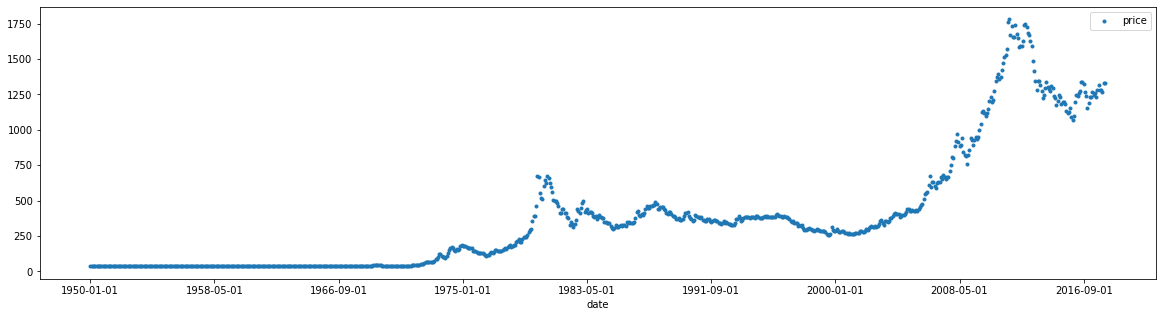

In [14]:
from matplotlib import pyplot as plt

df.set_index('date', inplace=True)
df.plot( style='.', figsize=(20,5))
plt.show()

In [25]:
# Null Hypothesis: The series has a unit root (value of a =1)
# Alternate Hypothesis: The series has no unit root.

from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


adf_test(df)


# Stationarity Criteria

# If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary).
# When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


Results of Dickey-Fuller Test:
Test Statistic                  -0.259757
p-value                          0.931014
#Lags Used                      11.000000
Number of Observations Used    806.000000
Critical Value (1%)             -3.438489
Critical Value (5%)             -2.865133
Critical Value (10%)            -2.568683
dtype: float64


### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

In [26]:
# Null Hypothesis: The process is trend stationary.
# Alternate Hypothesis: The series has a unit root (series is not stationary).

# (DIFFERENT HYPOTHESIS FRAMING w.r.t ADF)

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
        print (kpss_output)


# Stationarity Criteria

# If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary).
# When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


In [22]:
kpss_test(df)

Results of KPSS Test:
Test Statistic           2.983118
p-value                  0.010000
Lags Used               18.000000
Critical Value (10%)     0.347000
dtype: float64
Test Statistic           2.983118
p-value                  0.010000
Lags Used               18.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
dtype: float64
Test Statistic            2.983118
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64
Test Statistic            2.983118
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/ahsan/.local/share/virtualenvs/openDS-MZRDdKgs/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Types of Stationarity

# Making a Time Series Stationary